## Máster en Data Science - Redes Neuronales

# Neural Network with MNIST
Autor: Ramón Morillo Barrera

## Dataset: MNIST

### Sobre el dataset:

El dataset MNIST es un conjunto de datos ampliamente utilizado en machine learning y visión por computadora, diseñado para el reconocimiento de dígitos escritos a mano. Contiene 70,000 imágenes en escala de grises de 28x28 píxeles, divididas en 60,000 para entrenamiento y 10,000 para pruebas, con valores de píxeles entre 0 (negro) y 255 (blanco). Cada imagen está etiquetada con el dígito correspondiente (0-9), y su simplicidad lo hace ideal para desarrollar y evaluar algoritmos de clasificación, siendo especialmente popular en el entrenamiento de redes neuronales y aprendizaje profundo.

### Objetivo del proyecto:

1. **Construcción de un Modelo Predictivo**: Diseñar y programar una red neuronal capaz de clasificar imágenes del dataset MNIST, asignando a cada una el dígito correspondiente (0-9) con alta precisión.

2. **Entrenamiento Eficiente**: Entrenar la red neuronal utilizando el conjunto de datos de entrenamiento de MNIST, optimizando sus hiperparámetros para mejorar el rendimiento del modelo.

3. **Evaluación del Modelo**: Evaluar el desempeño del modelo utilizando el conjunto de prueba, midiendo métricas clave como la precisión y exactitud global para validar su efectividad.

4. **Optimización y Regularización**: Implementar técnicas como normalización, dropout o ajuste de tasas de aprendizaje para evitar el sobreajuste y mejorar la generalización del modelo.

5. **Visualización de Resultados**: Desarrollar visualizaciones que muestren el rendimiento del modelo, incluyendo gráficos de pérdida y precisión durante el entrenamiento, así como ejemplos de clasificaciones correctas e incorrectas.

6. **Aplicabilidad Práctica**: Demostrar que el modelo puede ser utilizado en tareas reales, como la identificación de dígitos en imágenes escritas a mano o aplicaciones de reconocimiento óptico de caracteres (OCR).

In [1]:
# librerías
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import BatchNorm1d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.optim as optim

In [2]:
seed = 12354

### Cargar y Preprocesar los Datos

In [3]:
# Cargar los datos desde los archivos .npz
X_train_data = np.load("X_train.npz")['X_tr']  # Acceder al array contenido
Y_train_data = np.load("Y_train.npz")['Y_tr']  # Acceder al array contenido


# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_data, Y_train_data, test_size=0.2, random_state=seed)

In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((28000, 784), (28000,), (7000, 784), (7000,))

In [5]:
# Convertir a tensores
X_train = torch.tensor(X_train, dtype=torch.float32) / 255.0  # Normalizar [0, 1]
X_test = torch.tensor(X_test, dtype=torch.float32) / 255.0
Y_train = torch.tensor(Y_train, dtype=torch.long)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# Ajustar la forma para imágenes [N, 1, 28, 28]
X_train = X_train.view(-1, 1, 28, 28)
X_test = X_test.view(-1, 1, 28, 28)

In [6]:
# Crear TensorDatasets para entrenamiento y prueba
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Para entrenamiento
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # Para prueba

# Verificar DataLoader
print(f"Tamaño de train_loader: {len(train_loader)} lotes")
print(f"Tamaño de test_loader: {len(test_loader)} lotes")

Tamaño de train_loader: 438 lotes
Tamaño de test_loader: 110 lotes


***
## 1. Construir una Red Neuronal Sencilla

# RELU

In [7]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Primera capa oculta
        self.fc2 = nn.Linear(128, 2)     # Capa de salida

    def forward(self, x):
        x = x.view(-1, 28*28)  # Aplanar la imagen
        x = torch.relu(self.fc1(x))  # Activación ReLU
        x = self.fc2(x)  # Salida (softmax será en la función de pérdida)
        return x

model = SimpleNN()

# Funcion de perdidas y Optimizadores 

# CrossEntropyLoss

In [8]:
# Definir la Función de Pérdida y Optimizador:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # LISTO

### Entrenar el Modelo

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 40
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Adelante
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Atrás
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

            # Guardar métricas por época
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100. * correct / total)

    accuracy = 100. * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%')

Epoch [1/40], Loss: 230.8621, Accuracy: 77.78%
Epoch [2/40], Loss: 149.6337, Accuracy: 85.36%
Epoch [3/40], Loss: 135.0946, Accuracy: 86.83%
Epoch [4/40], Loss: 129.1661, Accuracy: 87.55%
Epoch [5/40], Loss: 125.3624, Accuracy: 87.85%
Epoch [6/40], Loss: 122.8512, Accuracy: 88.27%
Epoch [7/40], Loss: 121.0387, Accuracy: 88.51%
Epoch [8/40], Loss: 119.2514, Accuracy: 88.65%
Epoch [9/40], Loss: 117.8498, Accuracy: 88.90%
Epoch [10/40], Loss: 116.4669, Accuracy: 89.15%
Epoch [11/40], Loss: 115.6156, Accuracy: 89.37%
Epoch [12/40], Loss: 114.8364, Accuracy: 89.38%
Epoch [13/40], Loss: 113.9142, Accuracy: 89.55%
Epoch [14/40], Loss: 112.9014, Accuracy: 89.64%
Epoch [15/40], Loss: 111.5726, Accuracy: 89.80%
Epoch [16/40], Loss: 110.1742, Accuracy: 89.98%
Epoch [17/40], Loss: 108.3500, Accuracy: 90.13%
Epoch [18/40], Loss: 106.0190, Accuracy: 90.37%
Epoch [19/40], Loss: 103.3484, Accuracy: 90.71%
Epoch [20/40], Loss: 100.8040, Accuracy: 90.93%
Epoch [21/40], Loss: 97.5071, Accuracy: 91.34%
Ep

### Evaluar el Modelo

In [10]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_accuracy = 100. * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 95.79%


Ejemplos correctamente clasificados:


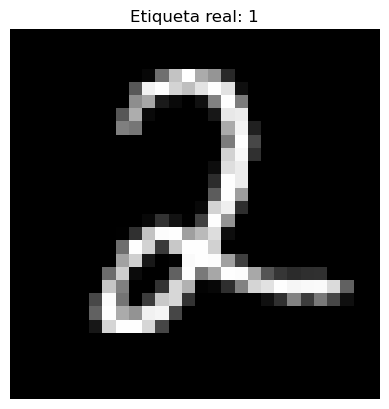

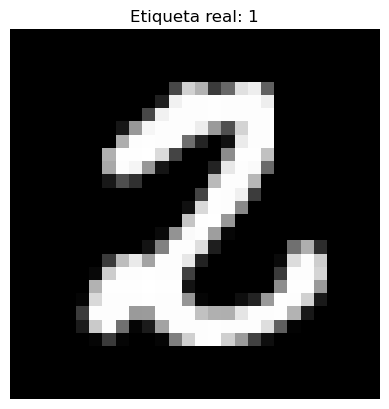

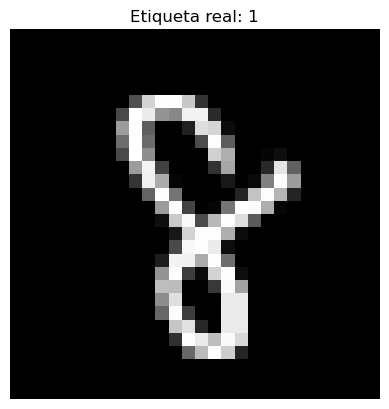

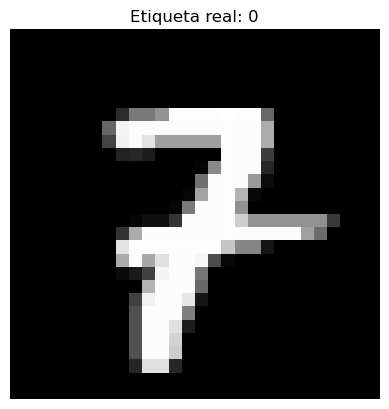

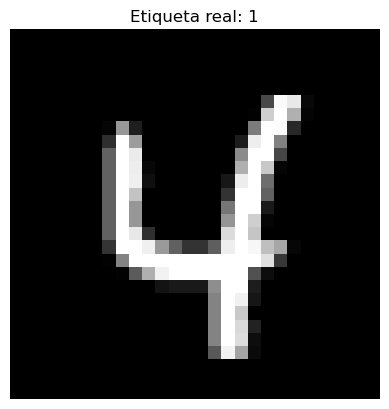

Ejemplos incorrectamente clasificados:


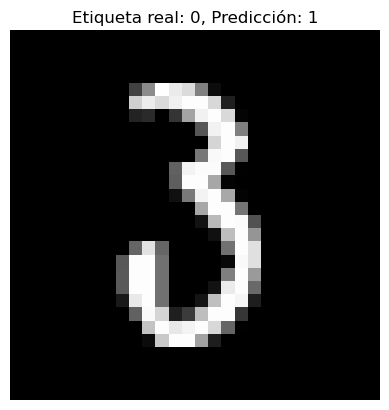

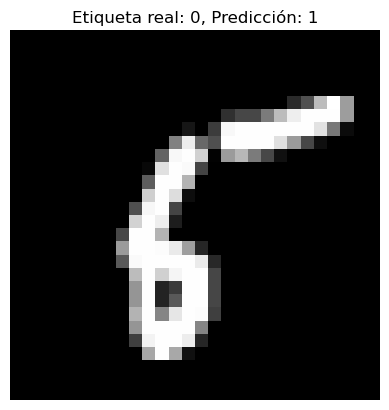

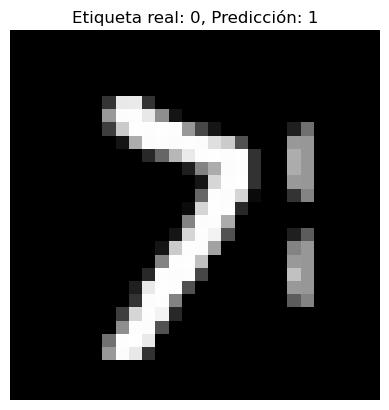

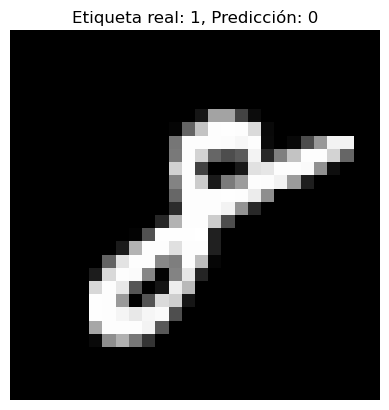

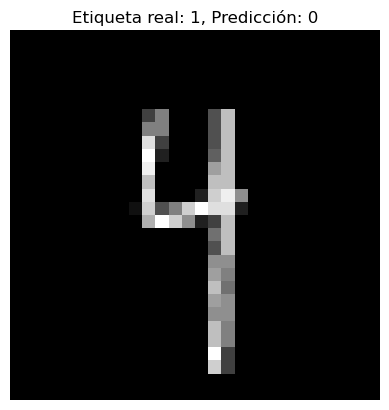

In [11]:
# Mostrar ejemplos correctamente e incorrectamente clasificados
misclassified = []
correctly_classified = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified.append((images[i], labels[i].item(), predicted[i].item()))
            else:
                correctly_classified.append((images[i], labels[i].item()))

# Mostrar 5 ejemplos correctamente clasificados
print("Ejemplos correctamente clasificados:")
for i in range(5):
    image, label = correctly_classified[i]
    plt.imshow(image.cpu().squeeze(), cmap='gray')
    plt.title(f'Etiqueta real: {label}')
    plt.axis('off')
    plt.show()

# Mostrar 5 ejemplos incorrectamente clasificados
print("Ejemplos incorrectamente clasificados:")
for i in range(5):
    image, true_label, pred_label = misclassified[i]
    plt.imshow(image.cpu().squeeze(), cmap='gray')
    plt.title(f'Etiqueta real: {true_label}, Predicción: {pred_label}')
    plt.axis('off')
    plt.show()


## 1.1 Graficados

### 1.1.1 Gráficas de Pérdida y Accuracy

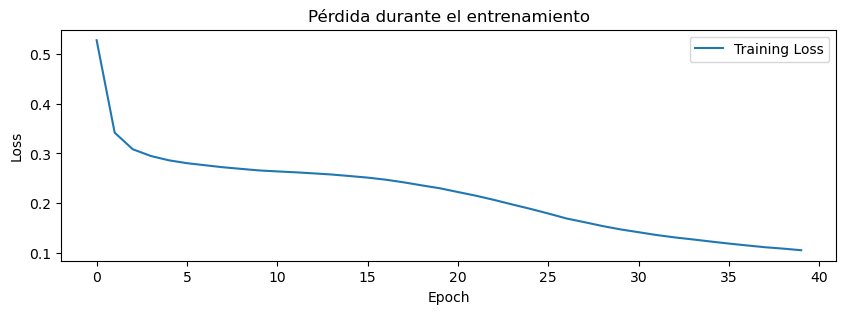

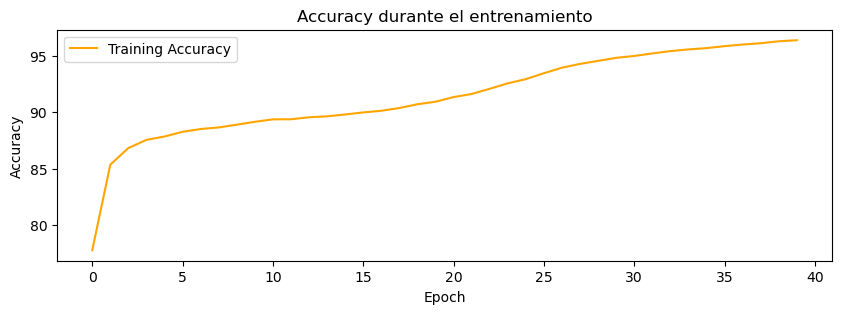

In [12]:
# Graficar pérdida
plt.figure(figsize=(10, 3))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 3))
plt.plot(train_accuracies, label='Training Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.legend()
plt.show()

### 1.1.2 Etiqutas clasificadas

Ejemplos correctamente clasificados:


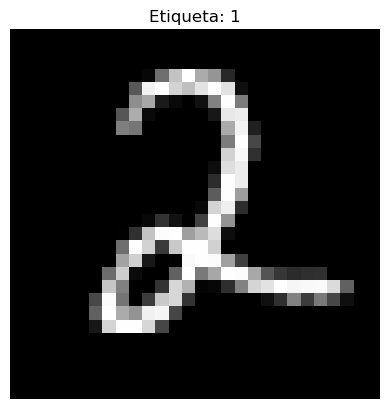

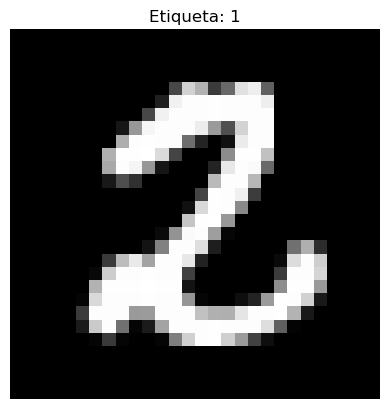

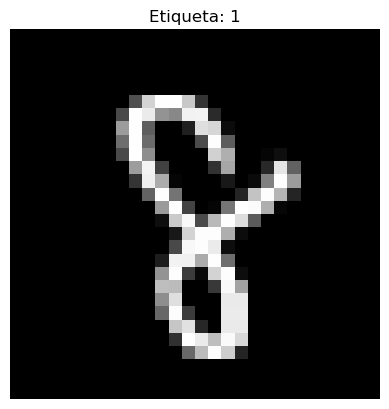

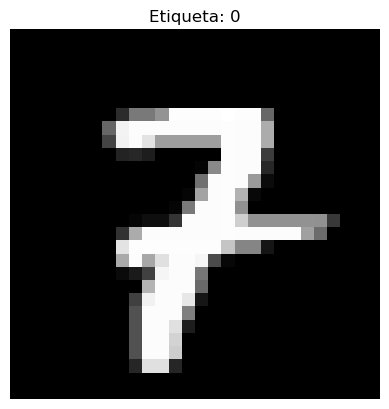

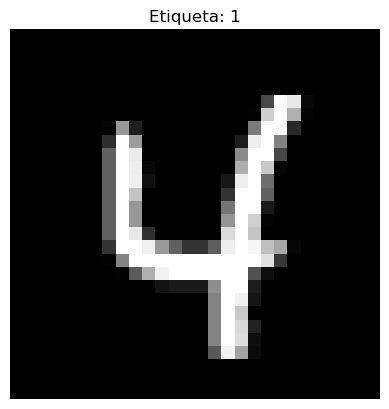

Ejemplos incorrectamente clasificados:


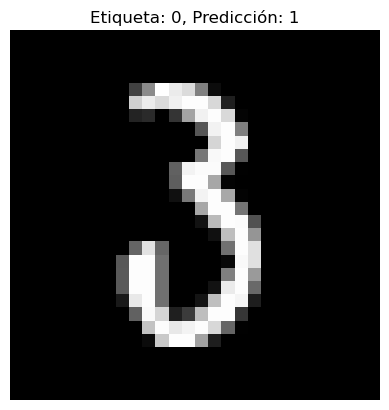

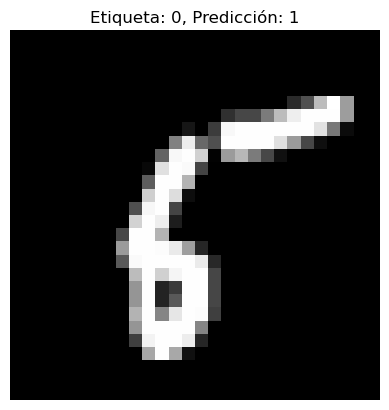

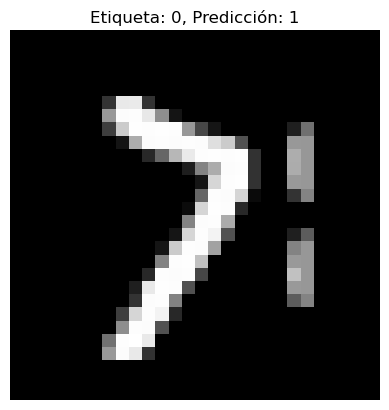

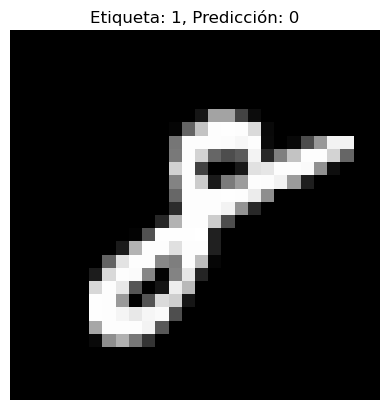

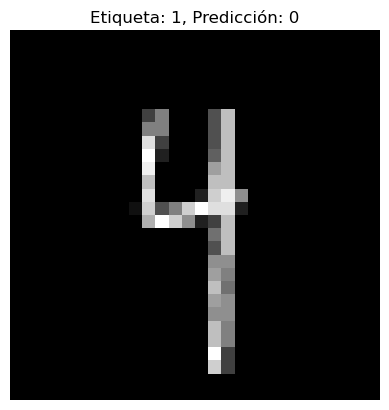

In [13]:
# Mostrar ejemplos correctamente e incorrectamente clasificados

model.eval()
misclassified = []
correctly_classified = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified.append((images[i], labels[i].item(), predicted[i].item()))
            else:
                correctly_classified.append((images[i], labels[i].item()))

# Mostrar ejemplos correctamente clasificados
print("Ejemplos correctamente clasificados:")
for i in range(5):
    image, label = correctly_classified[i]
    plt.imshow(image.cpu().squeeze(), cmap='gray')
    plt.title(f'Etiqueta: {label}')
    plt.axis('off')
    plt.show()

# Mostrar ejemplos incorrectamente clasificados
print("Ejemplos incorrectamente clasificados:")
for i in range(5):
    image, true_label, pred_label = misclassified[i]
    plt.imshow(image.cpu().squeeze(), cmap='gray')
    plt.title(f'Etiqueta: {true_label}, Predicción: {pred_label}')
    plt.axis('off')
    plt.show()

### 1.1.3 Matriz de confusion

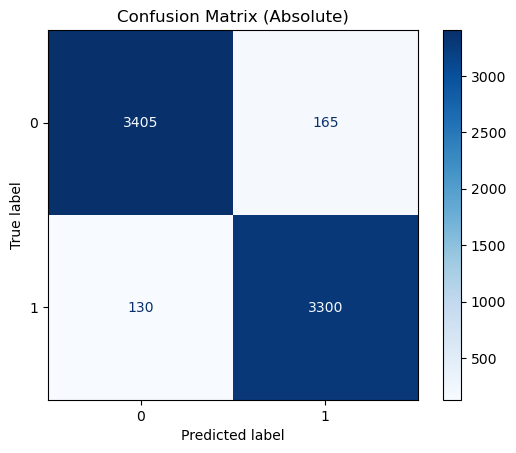

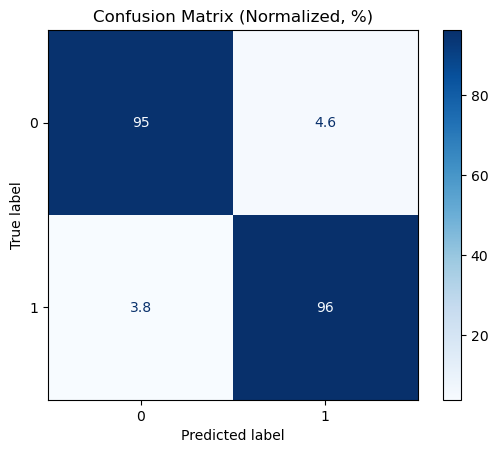

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrices(model, test_loader, device):
    # Calcular todas las etiquetas y predicciones
    all_labels = []
    all_predictions = []

    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calcular matriz de confusión
    cm = confusion_matrix(all_labels, all_predictions)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Visualizar matriz de confusión absoluta
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', xticks_rotation='horizontal')
    plt.title("Confusion Matrix (Absolute)")
    plt.show()

    # Visualizar matriz de confusión normalizada
    disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp_normalized.plot(cmap='Blues', xticks_rotation='horizontal')
    plt.title("Confusion Matrix (Normalized, %)")
    plt.show()

# Llamar a la función
plot_confusion_matrices(model, test_loader, device)

***
## 2. Mejorar el Modelo

## Redes de prueba



### Añadir más capas

In [15]:
class ImprovedNN(nn.Module):
    def __init__(self):
        super(ImprovedNN, self).__init__()
        # Definir capas completamente conectadas
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch Normalization para la primera capa
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)  # Batch Normalization para la segunda capa
        self.fc3 = nn.Linear(128, 2)
        
        # Definir Dropout
        self.dropout = nn.Dropout(0.5)  # Dropout con probabilidad del 50%

    def forward(self, x):
        x = x.view(-1, 28*28)  # Aplanar la imagen
        
        # Primera capa + BatchNorm + ReLU + Dropout
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        
        # Segunda capa + BatchNorm + ReLU + Dropout
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        
        # Capa de salida
        x = self.fc3(x)
        return x


model = ImprovedNN()
print(model)  


ImprovedNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


### Entrenar NN mejorada

In [16]:
# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Parámetros de entrenamiento
num_epochs = 40
train_losses = []
train_accuracies = []

# Entrenamiento del modelo
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Paso hacia adelante
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Paso hacia atrás y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Métricas
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        # Guardar métricas por época
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100. * correct / total)

    # Cálculo del accuracy
    train_accuracy = 100. * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

Epoch [1/40], Loss: 81.8643, Accuracy: 92.63%
Epoch [2/40], Loss: 50.8761, Accuracy: 95.82%
Epoch [3/40], Loss: 43.8723, Accuracy: 96.44%
Epoch [4/40], Loss: 38.9169, Accuracy: 96.83%
Epoch [5/40], Loss: 35.9878, Accuracy: 96.97%
Epoch [6/40], Loss: 32.7761, Accuracy: 97.28%
Epoch [7/40], Loss: 30.5914, Accuracy: 97.48%
Epoch [8/40], Loss: 27.7542, Accuracy: 97.71%
Epoch [9/40], Loss: 27.4553, Accuracy: 97.71%
Epoch [10/40], Loss: 25.4518, Accuracy: 98.00%
Epoch [11/40], Loss: 24.7380, Accuracy: 97.95%
Epoch [12/40], Loss: 23.7005, Accuracy: 98.12%
Epoch [13/40], Loss: 20.8219, Accuracy: 98.25%
Epoch [14/40], Loss: 20.8072, Accuracy: 98.26%
Epoch [15/40], Loss: 21.4706, Accuracy: 98.30%
Epoch [16/40], Loss: 18.9576, Accuracy: 98.38%
Epoch [17/40], Loss: 18.3617, Accuracy: 98.37%
Epoch [18/40], Loss: 17.4893, Accuracy: 98.59%
Epoch [19/40], Loss: 17.6326, Accuracy: 98.49%
Epoch [20/40], Loss: 16.5882, Accuracy: 98.64%
Epoch [21/40], Loss: 15.9588, Accuracy: 98.68%
Epoch [22/40], Loss: 1

In [17]:
# Evaluación en el conjunto de prueba
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_accuracy = 100. * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 98.33%


## 3. Analizar y Visualizar Resultados

### 3.1 Graficar resultados

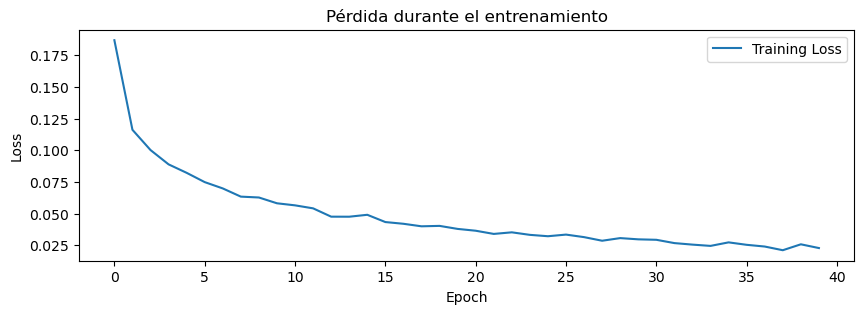

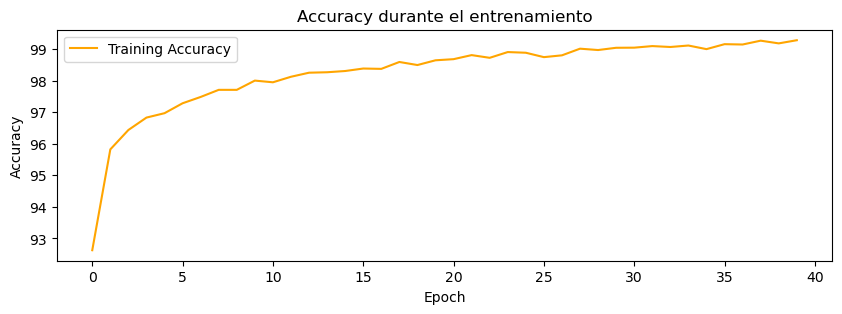

In [18]:
# Graficar pérdida
plt.figure(figsize=(10, 3))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 3))
plt.plot(train_accuracies, label='Training Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.legend()
plt.show()

### 3.2 Analizar predicciones del modelo 

Ejemplos correctamente clasificados:


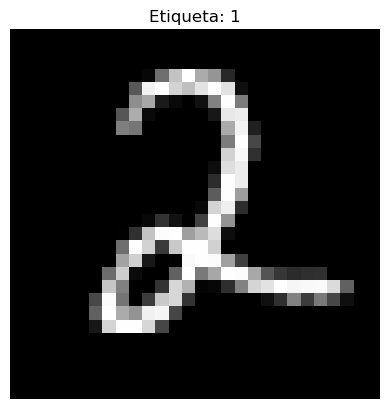

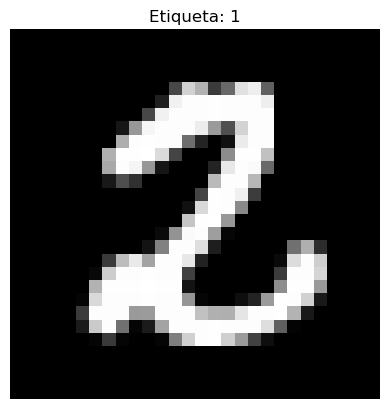

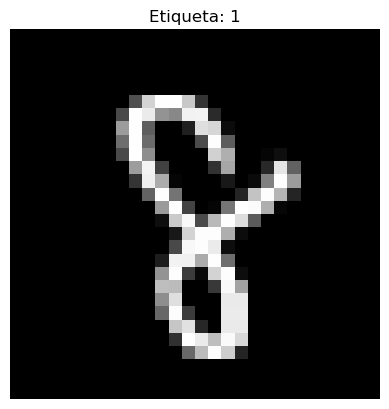

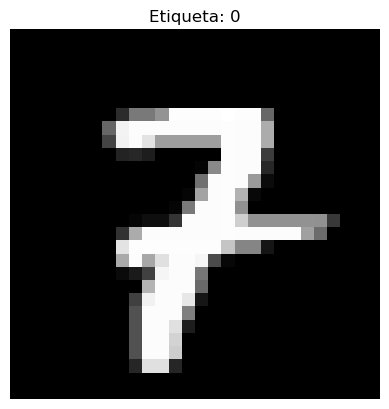

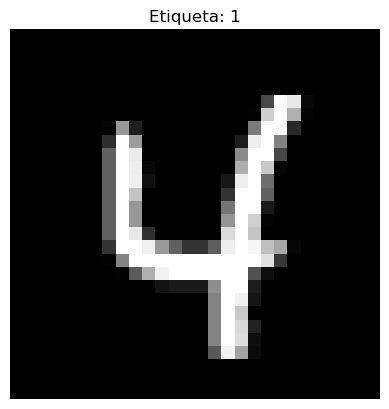

Ejemplos incorrectamente clasificados:


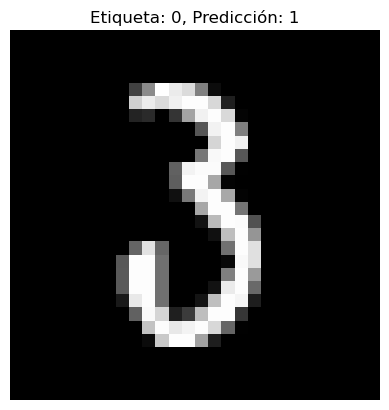

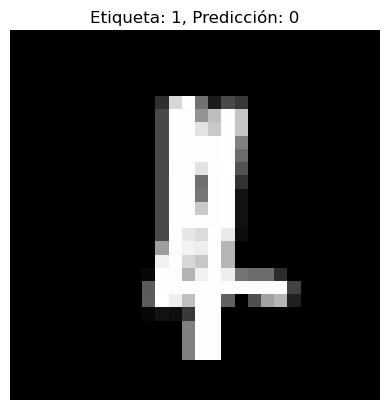

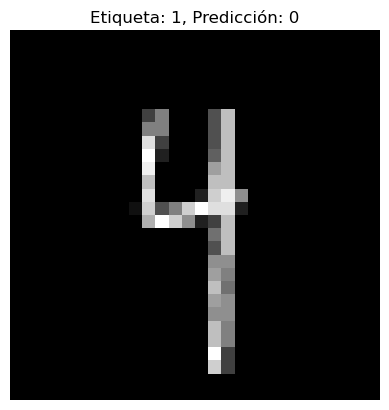

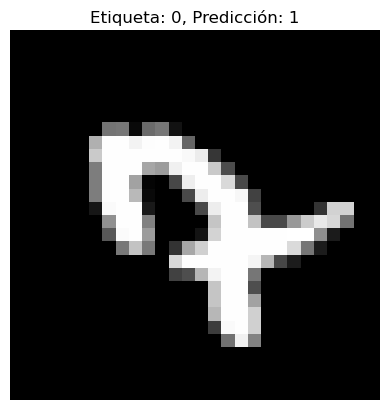

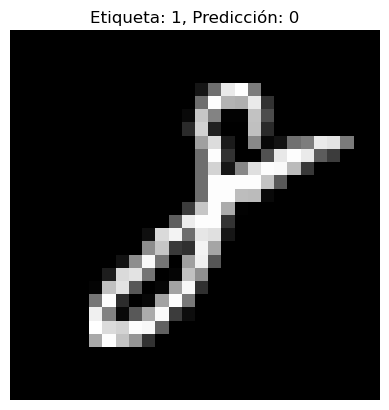

In [19]:
# Mostrar ejemplos correctamente e incorrectamente clasificados

model.eval()
misclassified = []
correctly_classified = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified.append((images[i], labels[i].item(), predicted[i].item()))
            else:
                correctly_classified.append((images[i], labels[i].item()))

# Mostrar ejemplos correctamente clasificados
print("Ejemplos correctamente clasificados:")
for i in range(5):
    image, label = correctly_classified[i]
    plt.imshow(image.cpu().squeeze(), cmap='gray')
    plt.title(f'Etiqueta: {label}')
    plt.axis('off')
    plt.show()

# Mostrar ejemplos incorrectamente clasificados
print("Ejemplos incorrectamente clasificados:")
for i in range(5):
    image, true_label, pred_label = misclassified[i]
    plt.imshow(image.cpu().squeeze(), cmap='gray')
    plt.title(f'Etiqueta: {true_label}, Predicción: {pred_label}')
    plt.axis('off')
    plt.show()


###  3.3 Calcular y visualizar métricas avanzadas

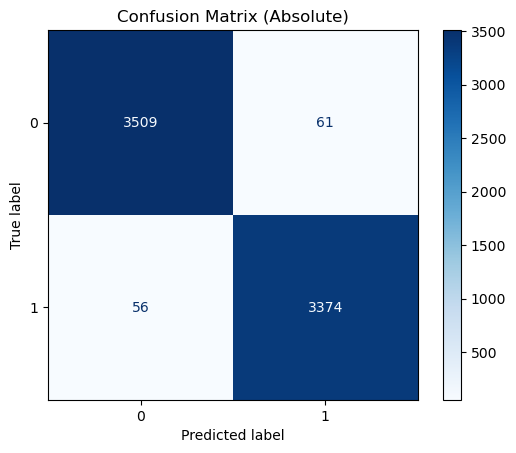

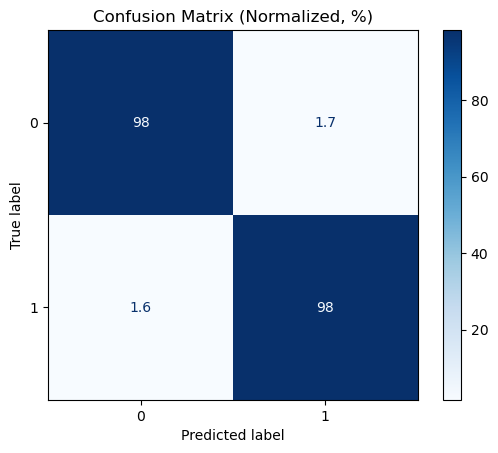

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrices(model, test_loader, device):
    # Calcular todas las etiquetas y predicciones
    all_labels = []
    all_predictions = []

    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calcular matriz de confusión
    cm = confusion_matrix(all_labels, all_predictions)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Visualizar matriz de confusión absoluta
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', xticks_rotation='horizontal')
    plt.title("Confusion Matrix (Absolute)")
    plt.show()

    # Visualizar matriz de confusión normalizada
    disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp_normalized.plot(cmap='Blues', xticks_rotation='horizontal')
    plt.title("Confusion Matrix (Normalized, %)")
    plt.show()

# Llamar a la función
plot_confusion_matrices(model, test_loader, device)


# Red Neuronal Convolucional

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Paso 1: Cargar los datos
X_train_data = np.load("X_train.npz")['X_tr']  # Datos de entrada
Y_train_data = np.load("Y_train.npz")['Y_tr']  # Etiquetas

# Convertir las etiquetas para clasificación binaria (pares e impares)
Y_train_data = (Y_train_data % 2 == 0).astype(int)  # Par = 1, Impar = 0

# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_data, Y_train_data, test_size=0.2, random_state=42
)

# Paso 3: Convertir a tensores y normalizar
X_train = torch.tensor(X_train, dtype=torch.float32) / 255.0
X_test = torch.tensor(X_test, dtype=torch.float32) / 255.0
Y_train = torch.tensor(Y_train, dtype=torch.long)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# Ajustar las dimensiones para imágenes [N, 1, 28, 28]
X_train = X_train.view(-1, 1, 28, 28)
X_test = X_test.view(-1, 1, 28, 28)

# Paso 4: Crear TensorDatasets y DataLoaders
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Red Conv con batch

In [22]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        
        # Capas convolucionales
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Dropout2d(0.25),  # Dropout espacial
        )
        
        # Capas fully connected
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 7 * 7, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 2)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

model = ImprovedCNN()

## Entrenamiento Conv NN

In [24]:
# 3. Optimizador con L2 regularization (weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# 4. Función de pérdida
criterion = nn.CrossEntropyLoss()

# 5. Early Stopping (detener entrenamiento si no mejora en 5 épocas)
best_val_accuracy = 0
epochs_no_improve = 0
num_epochs = 30

for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels.long())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Validación
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.long()).sum().item()
    
    val_accuracy = 100 * correct / total
    
    # Early Stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == 5:
            print("Early Stopping!")
            break

        # Calcular métricas
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # Guardar métricas por época
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100. * correct / total)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {train_accuracies[-1]:.2f}%')


Epoch [1/30], Loss: 9.9619, Accuracy: 89.46%
Epoch [2/30], Loss: 9.9619, Accuracy: 95.43%
Epoch [3/30], Loss: 10.0882, Accuracy: 95.24%
Epoch [4/30], Loss: 10.0882, Accuracy: 95.74%
Epoch [5/30], Loss: 10.1579, Accuracy: 90.85%
Epoch [6/30], Loss: 10.1579, Accuracy: 97.57%
Epoch [7/30], Loss: 10.1761, Accuracy: 52.55%
Epoch [8/30], Loss: 10.1859, Accuracy: 66.13%
Epoch [9/30], Loss: 10.1934, Accuracy: 61.25%
Epoch [10/30], Loss: 10.2141, Accuracy: 83.90%
Early Stopping!


## Evaluacion Conv NN

In [25]:
# Paso 9: Evaluar el modelo en el conjunto de prueba
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f'Test Accuracy: {100. * correct / total:.2f}%')

Test Accuracy: 90.77%


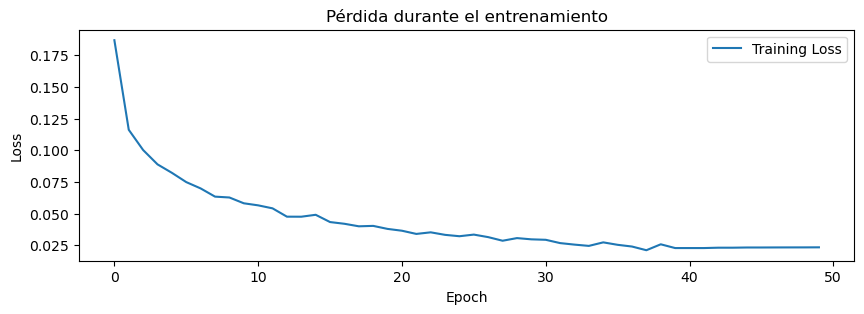

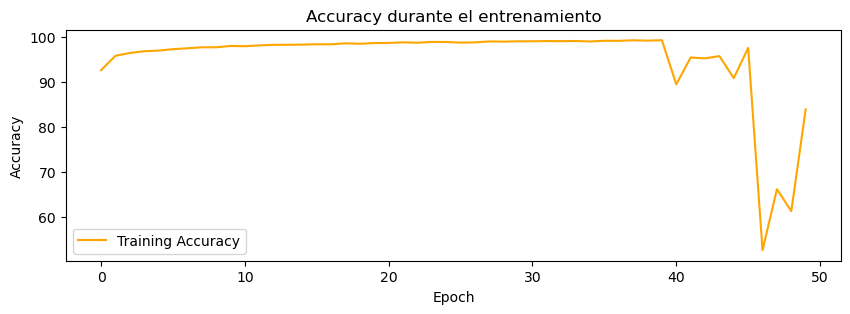

In [26]:
# Graficar pérdida
plt.figure(figsize=(10, 3))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 3))
plt.plot(train_accuracies, label='Training Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.legend()
plt.show()